In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import glauber 

In [14]:
Lx = 30
Ly = 30

spins_initial = glauber.initialize_spins(Lx,Ly,random=True)

J_matrix = glauber.nn_coupling(1.,Lx,Ly)

T = 0.03
nsteps = 100000



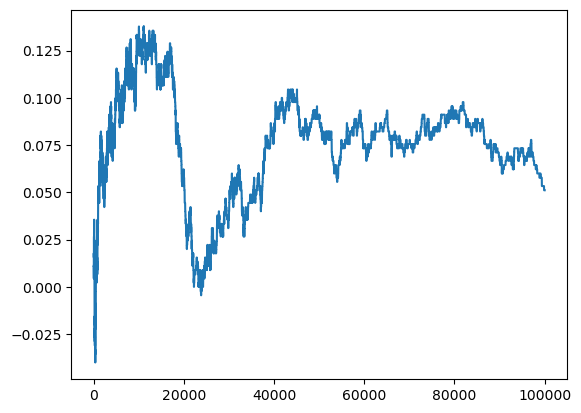

In [15]:
spins = glauber.dynamics(spins_initial,nsteps,J_matrix,T)

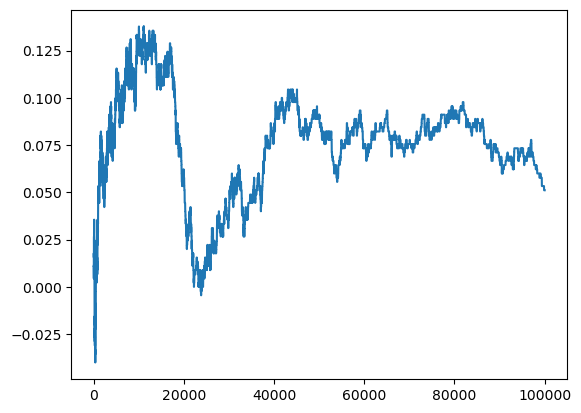

KeyboardInterrupt: 

In [33]:
plt.plot(glauber.calc_mag(spins) )
plt.show()
plt.plot(glauber.calc_energy(spins,J_matrix))
plt.show()

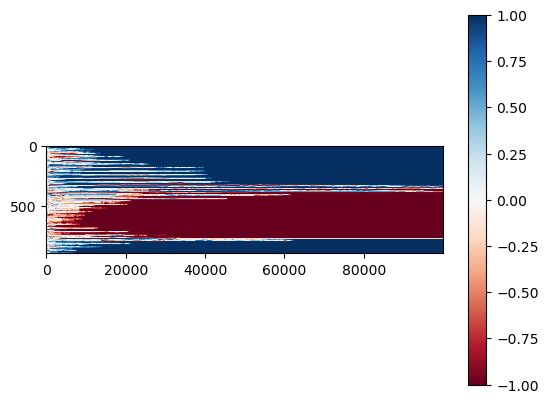

In [18]:
plt.imshow(spins,cmap='RdBu',aspect=30)
plt.colorbar()
plt.show()

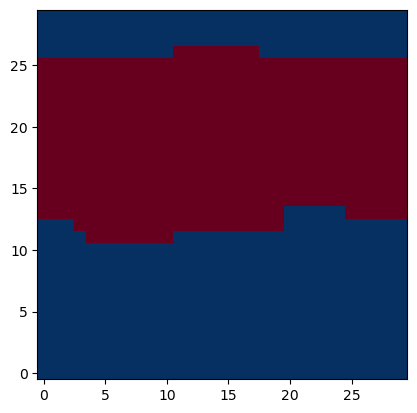

In [32]:
plt.imshow(spins[:,60000].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()